# **Project Name**    -  **Movie recommendation System**



* **Project Type - Unsupervised**
* **Contribution - Individual**

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Netflix's movie recommendation system is a critical component of its success and user experience. The company heavily relies on data-driven algorithms and machine learning to suggest personalized movie and TV show recommendations to its users. 

The company invests heavily in research and development to continuously enhance its algorithms, with the goal of providing users with a highly engaging and personalized streaming experience.

 Netflix emphasizes both personalization and serendipity in its recommendation system. While personalization ensures that users receive relevant recommendations based on their preferences, serendipity introduces a certain level of exploration by occasionally suggesting content that may not align directly with a user's previous choices but still has a potential appeal.


# **Start with the project**

## **Know your data**


### import the libraries

In [ ]:
# install libraries
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import spacy
import en_core_web_sm
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Load the dataset and perform EDA**


In [ ]:
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# view the top 5 records of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# bottom 5 records of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# check the shape of the dataset
df.shape

(7787, 12)

### Understand the features of the datset

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Features**

1. **show_id:**  Describes the if of the show 
2. **type:** This feature describes the type of the show either movie or Tv Shows
3. **title:** This feature describes the title of the show (Name of the show)
4. **Director:** Name of the directore with respect to shows of the netflix projects
5. **cast:** Describes the actors/actoress worked in the shows
6. **country:** Show belongs to which country
7. **date_added:** When the movie is added to the netflix platfrom
8. **release_year:** The release year of the movie.
9. **rating:** Overall rating of the shows in the platform
10. **duration:** length of the shows 
11. **listed_in:** The genre of the shows 
12. **description:** Berief description of the shows in the platform


### Information of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### duplication of the data

In [ ]:
len(df[df.duplicated()])


0

As we can see that there is no duplication availabe in the data

## **Overall information of the data**

In [ ]:
def information():
    data = pd.DataFrame(df.dtypes,columns=['DataTypes'])
    data['Missing'] = df.isnull().sum().values    
    data['%_of_nulll_values'] = df.isnull().mean()
    data['Uniques'] = df.nunique().values
    return data

In [ ]:
# apply the data into dataset
information()

,DataTypes,Missing,%_of_nulll_values,Uniques
show_id,object,0,0.000000,7787
type,object,0,0.000000,2
title,object,0,0.000000,7787
director,object,2389,0.306793,4049
cast,object,718,0.092205,6831
country,object,507,0.065109,681
date_added,object,10,0.001284,1565
release_year,int64,0,0.000000,73
rating,object,7,0.000899,14
duration,object,0,0.000000,216


<Axes: >

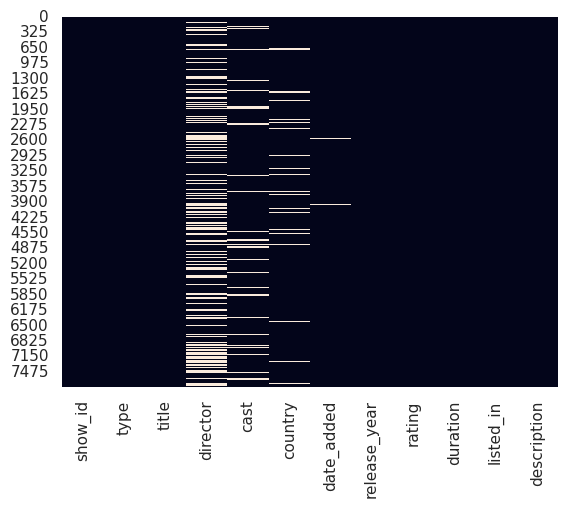

In [ ]:
# plotiing the null values
sns.heatmap(df.isnull(), cbar = False)

**Amount of the null values in the dataset**

30% NaN values are available in the **director** featurs in the dataset

9.2% NaN values are available in the **Cast** featurs in the dataset

6.5% NaN values are available in the **Counrty** featurs in the dataset

1.2% and 0.8% NaN values are in the **rating** and **date_added** in the dataset


### Treat the null values

In [ ]:
# as we can see there are 7 NaN values in the rating features in the dfset
# So we can drop the NaN Values form the datset
df=df[df['rating'].notna()]
df.rating.isnull().sum()

0

In [ ]:
# as we can see there are 10 NaN values in the rating features in the dfset
# So we can drop the NaN Values form the datset
df=df[df['date_added'].notna()]
df.date_added.isnull().sum()

0

In [ ]:
# now find the new shape of the dataset
df.shape

(7770, 12)

## **Anaysis and Visualizations of the data**

#### count the number of TV shows and number of Movies in the platform

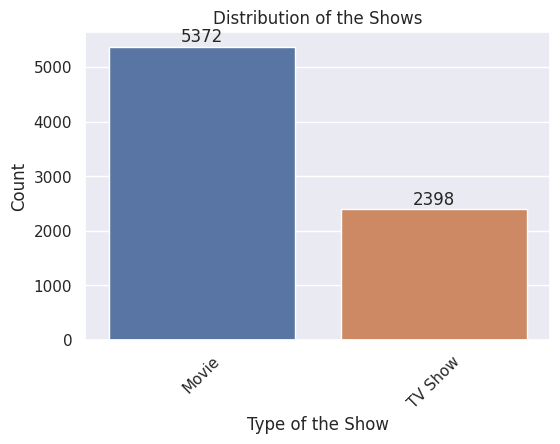

In [ ]:
# Count the occurrences of each unique value
types_count = df['type'].value_counts()

# Plot the barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=types_count.index, y=types_count.values)
plt.xlabel('Type of the Show')
plt.ylabel('Count')
plt.title('Distribution of the Shows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Display the count on top of each bar
for i, count in enumerate(types_count):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.show()

#### Analysis of the shows with respect to years and months


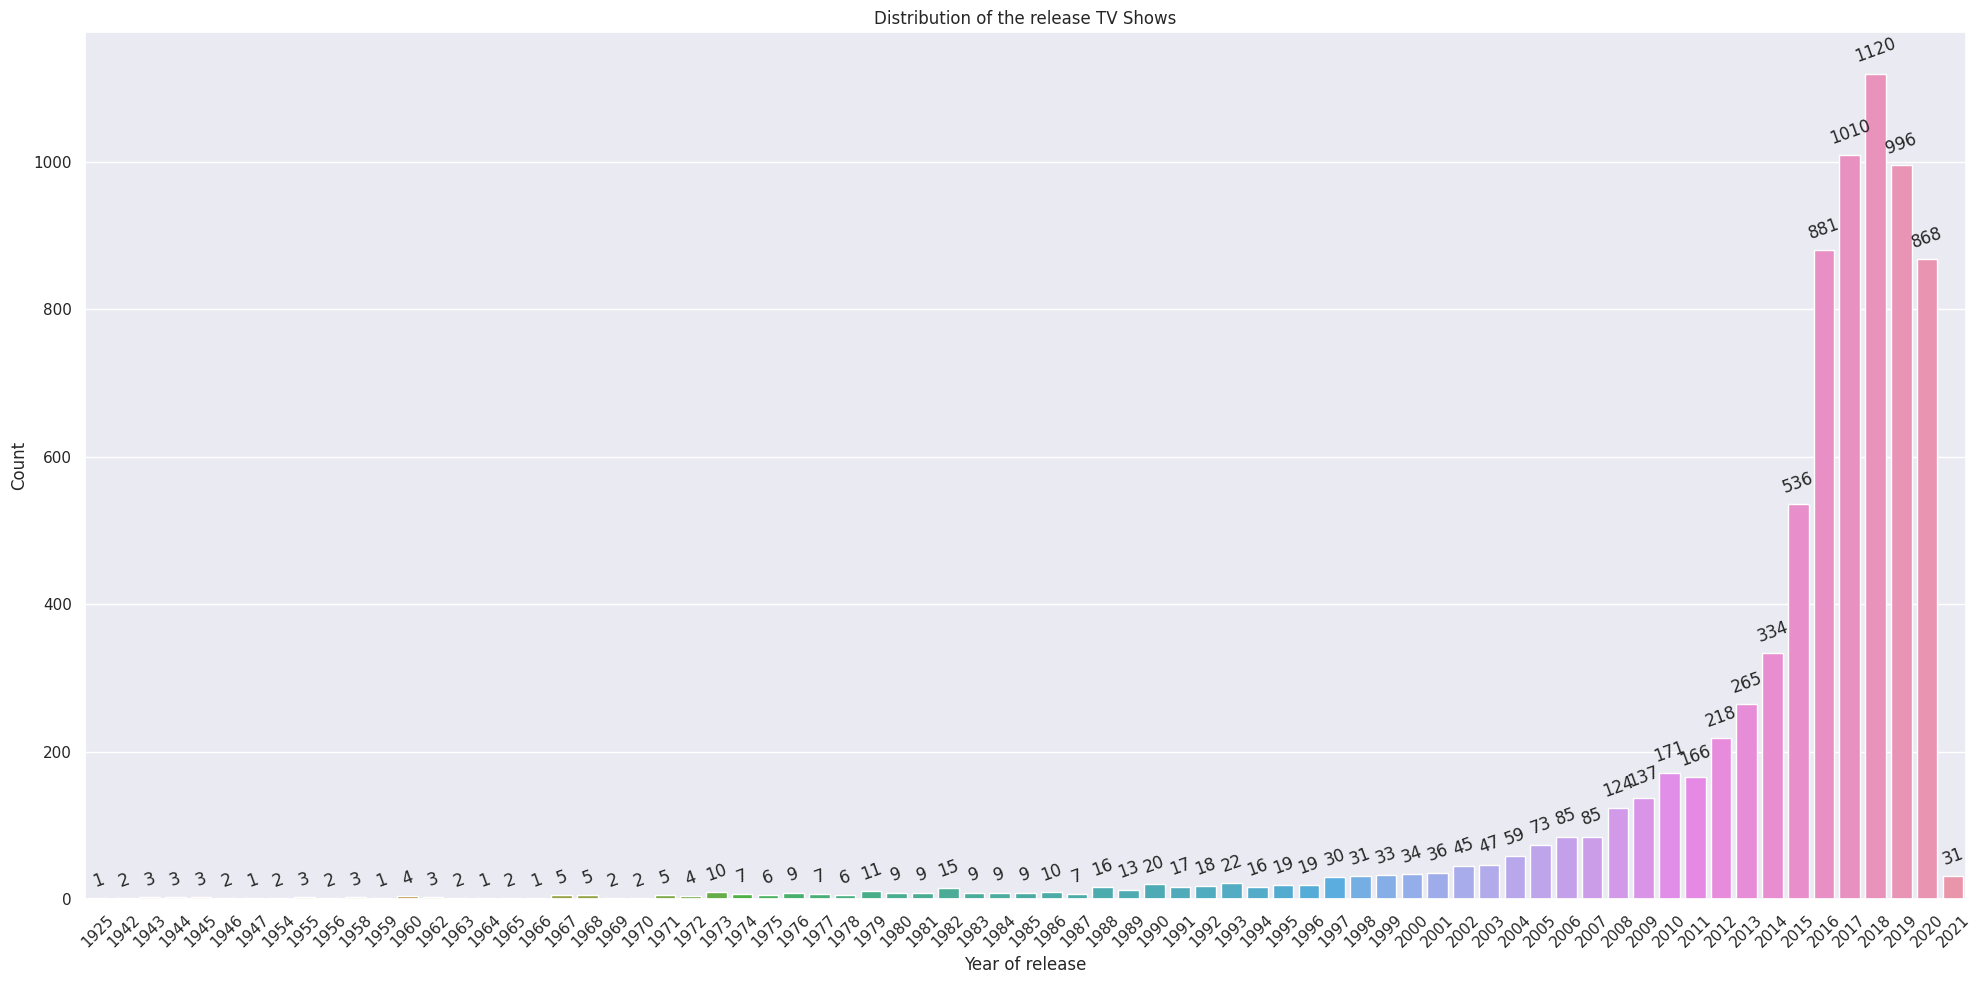

In [ ]:
release_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=release_count.index, y=release_count.values)
plt.xlabel('Year of release')
plt.ylabel('Count')
plt.title('Distribution of the release TV Shows')
plt.xticks(rotation=45)

# Display the count on top of each bar
for i, count in enumerate(release_count):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', rotation=20)

plt.tight_layout()
plt.show()

#### Check when the show has been added to the platform

In [ ]:
date= df[['date_added']].dropna()
date['year'] = date['date_added'].apply(lambda x: x.split(',')[-1])
date['month'] = date['date_added'].apply(lambda x: x.split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #::-1 just reverse this nigga

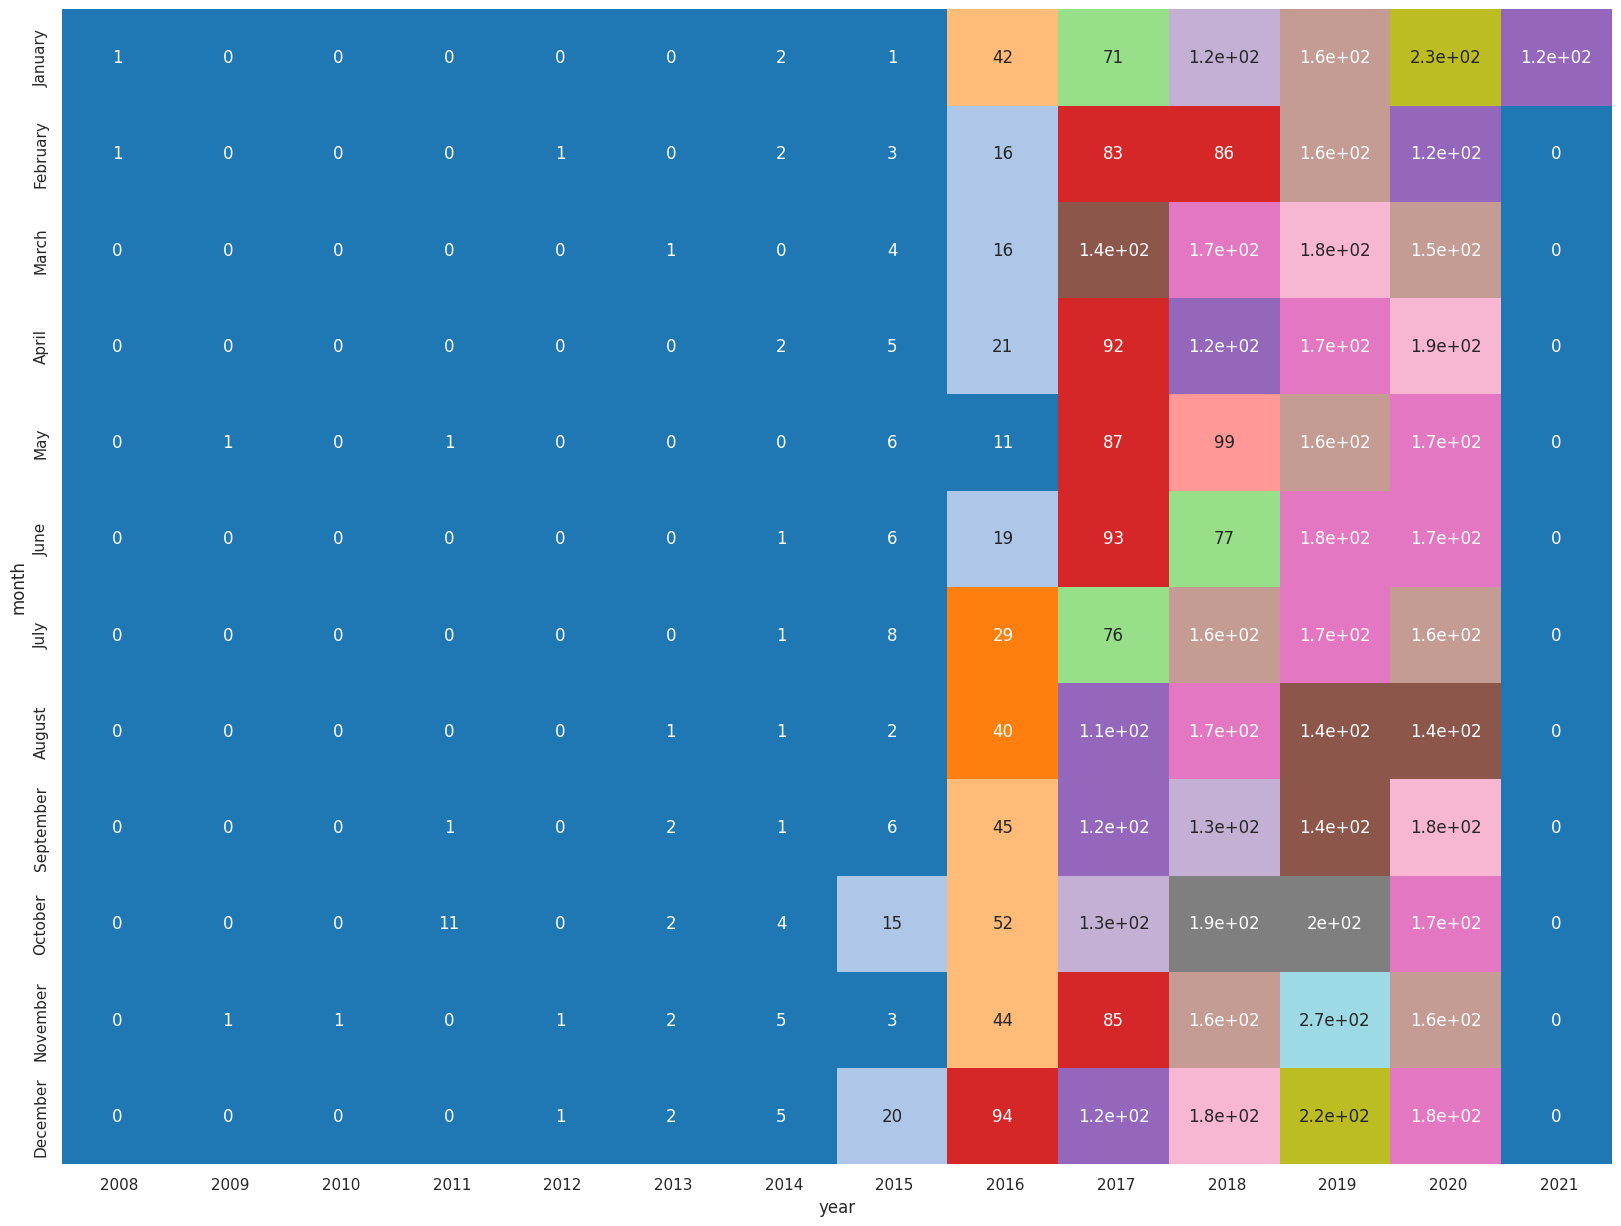

In [ ]:
show = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.subplots(figsize=(20,15))
sns.heatmap(show, cmap='tab20', annot=True, cbar=False) #heatmap
plt.show()


#### release year of the show and remove the outlier of column


In [ ]:
# check the datatypes of the columns
type(df['release_year'][0])

numpy.int64

In [ ]:
# count the value of the release year of the movies
df['release_year'].value_counts()

2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

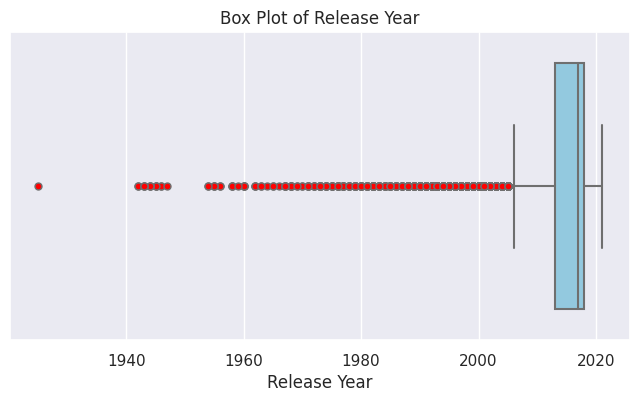

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['release_year'], color='skyblue', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5})
plt.xlabel('Release Year')
plt.title('Box Plot of Release Year')
plt.show()


As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values(release_year less than 2009) as outliers

**Treat the outliers**

Outliers are data points that significantly deviate from the majority of the data in a dataset. These are observations that lie far away from the central tendency of the distribution and may indicate unusual or anomalous behavior compared to the rest of the data.

The interquartile range (IQR) is the width of the box in the box-and-whisker plot. That is, IQR = Quartile 3 – Quartile 1. The IQR can be used as a measure of how spread out the values are.

2005.5


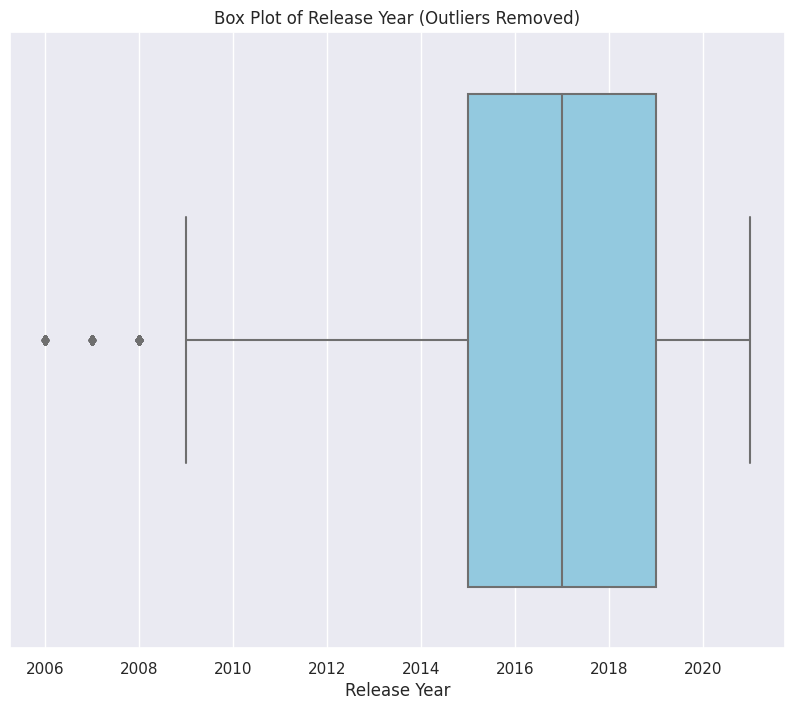

In [ ]:
# Replcae the outlier with the mean value.

# Calculate the interquartile range (IQR)
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
# Remove the outliers from the 'release_year' column
df_filtered = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

# Draw the box plot without outliers
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_filtered['release_year'], color='skyblue')
plt.xlabel('Release Year')
plt.title('Box Plot of Release Year (Outliers Removed)')
plt.show()

### Analysis the title of the show 

#### find the number of unique values in the dataset


In [ ]:
df['title'].shape

(7770,)

In [ ]:
#find the duplicated 
df[df['title'].duplicated()]

# there is no duplicate value in the title column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# find the unique values of the dataset
df['title'].nunique()

7770

#### find the most used words inthe dataset 


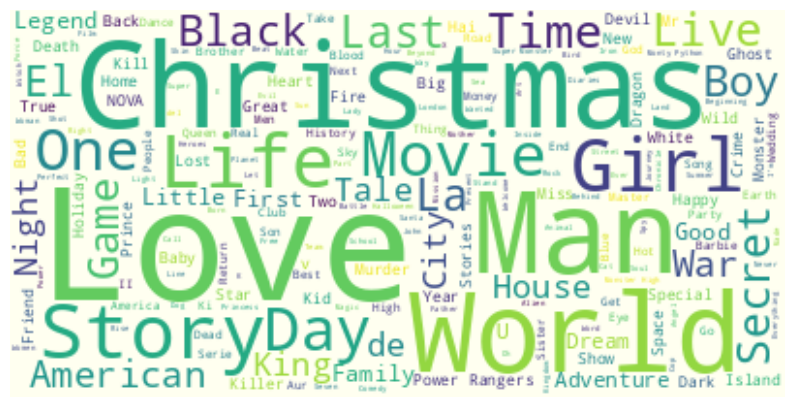

In [ ]:
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)

# Create stopword list:
plt.figure(figsize=(10, 8))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, mode = "RGBA" ,background_color="#fffff0").generate(text)
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words **Man, Love, Christmas, World, Story, Movie, Game, table, Day, Last, King** these words are appearing frequesntly in the movies titles


### find the type of the show contributes by the country.


####check the null values of the dataset, if the NaN values are affecting the datset then replace the null values of the dataset with the Mode of the country


In [ ]:
df['country'].isnull().sum()

505

In [ ]:
df.country[df.country.isna()] = df.country.mode()[0]


In [ ]:
df['country'].isnull().sum()
# replace the null values of the dataset


0

#### check the unique country name


In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T


,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,3051,923,396,224,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


#### visualize the counrty name

In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
country_df

,country,Productions,TV-Shows,Movies
0,United States,3793,1136,2657
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265
...,...,...,...,...
113,Kazakhstan,1,0,1
114,Vatican City,1,0,1
115,Albania,1,0,1
116,Paraguay,1,0,1


<Figure size 2000x1500 with 0 Axes>

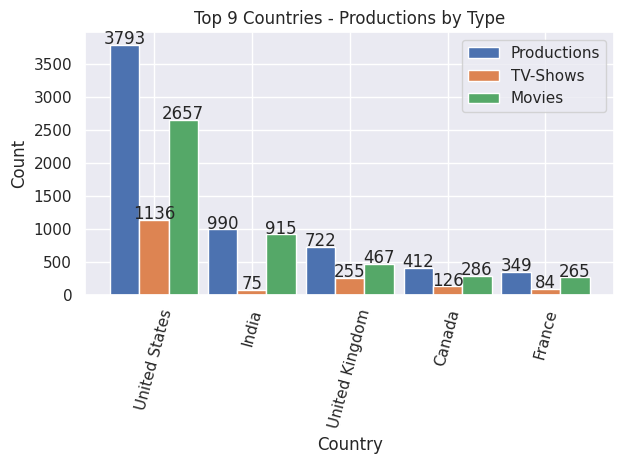

In [ ]:
plt.figure(figsize=(20, 15))
ax = country_df.head(5).plot(x="country", y=['Productions', 'TV-Shows', 'Movies'], kind="bar", width=.9)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 9 Countries - Productions by Type')

# Add count on top of each bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(count, (x, y), ha='center')

plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


### Find and analyze the duration of the show.


In [ ]:
# check the null values in the duration of the show
df['duration'].isnull().sum()

# There is no null values in the dataset 


0

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list 

# call the functions
all_the_duration_in_minutes()

<Axes: xlabel='duration', ylabel='Density'>

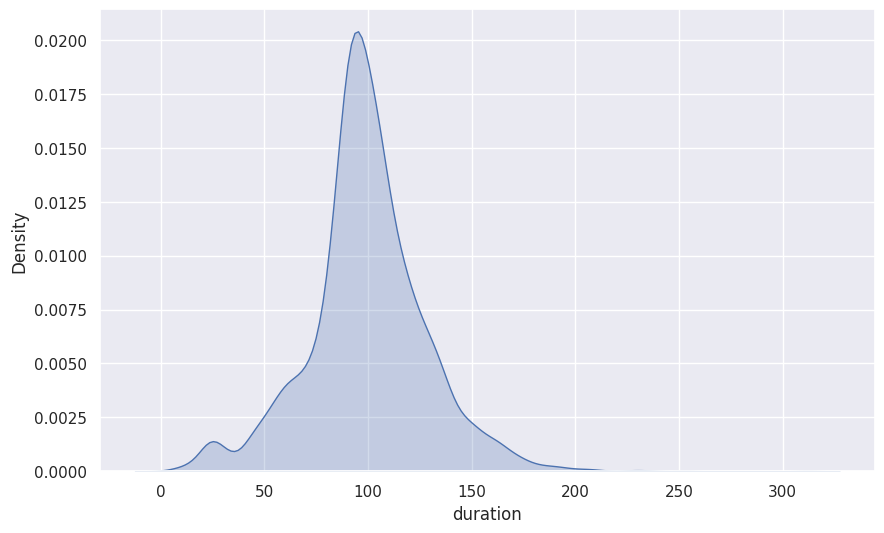

In [ ]:

sns.set(style="darkgrid")
plt.figure(figsize = (10,6))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

<Axes: xlabel='duration', ylabel='Density'>

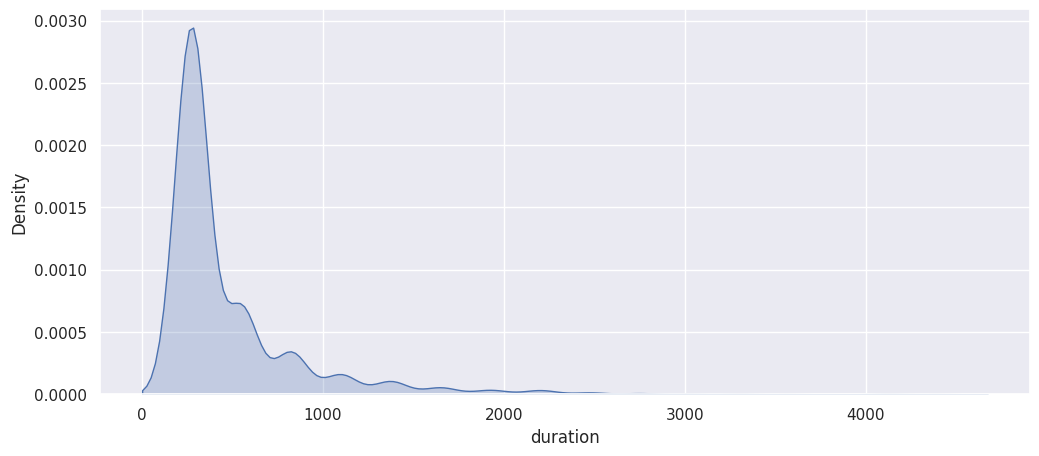

In [ ]:
# Duration of the TV Shows
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

### Treat and Analyze the Listed-in column

In [ ]:
# find the null values in the column
df['listed_in'].isnull().sum()
# there is no null values in the columns


0

In [ ]:
# find the unique value of the listed-in column
df.listed_in.nunique()

491

In [ ]:
# draw a dataframe of the unique values of the listed in column
df['listed_in'].value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# define the categories of the listed-in features
categories = ", ".join(df['listed_in']).split(", ")
categories[:10]


['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy']

In [ ]:
len(set(categories))

42

there are 42 unique categories of the show listed--in 

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)


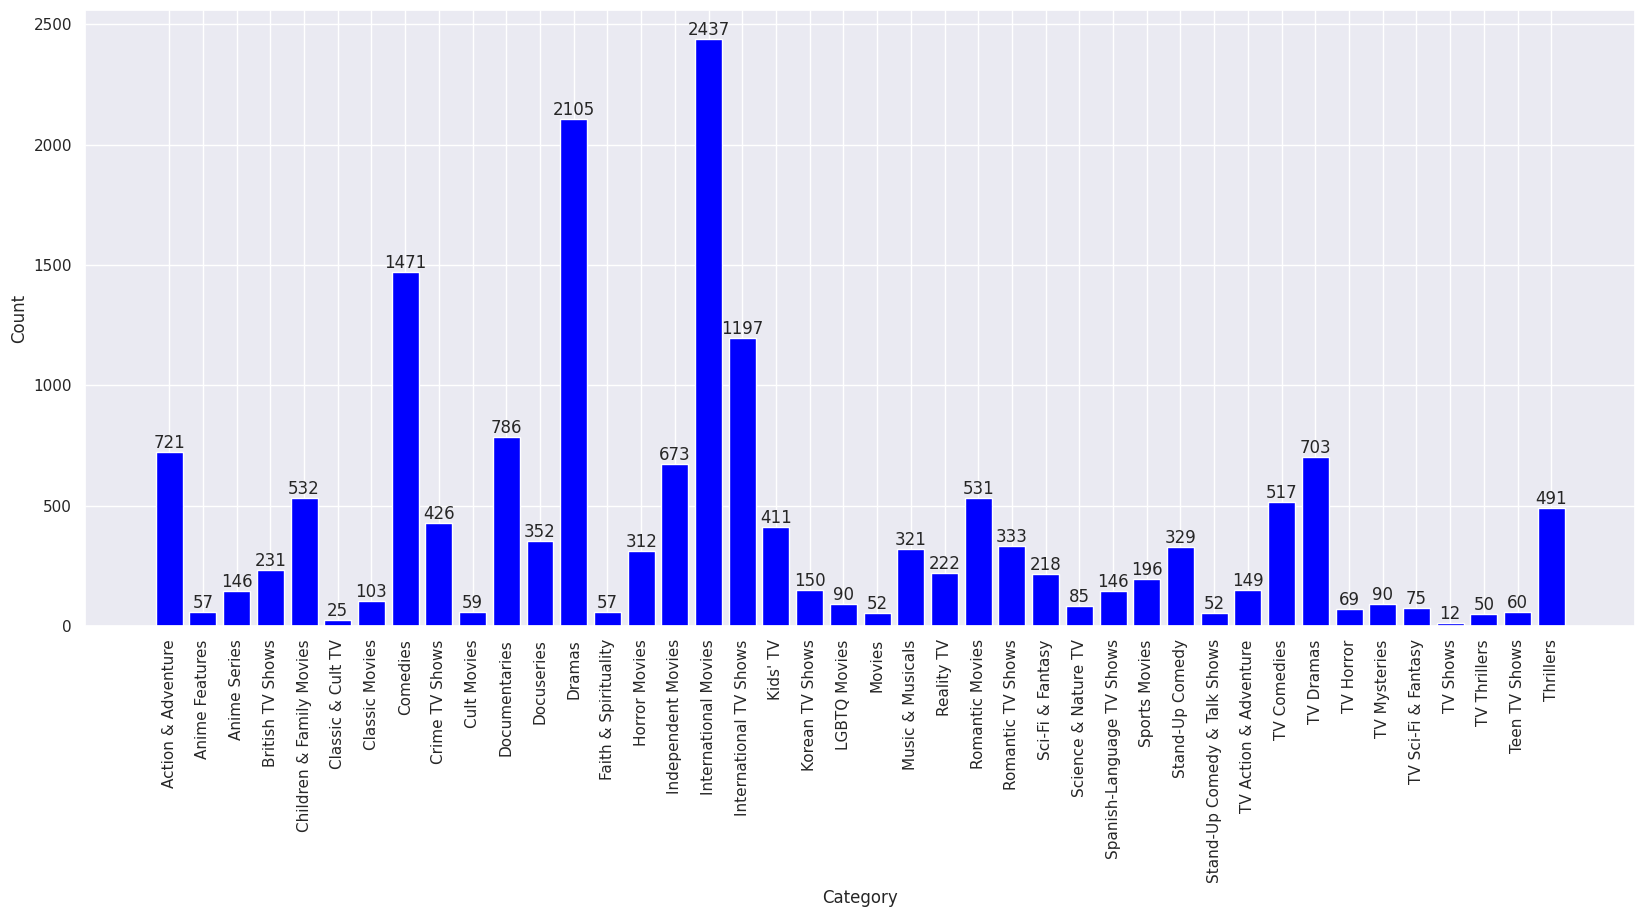

In [ ]:
# Get the unique categories and sort them
categories = sorted(set(category_wise_count.keys()))

# Get the counts for each category
counts = [category_wise_count[category] for category in categories]

# Create the bar plot
plt.figure(figsize=(20, 8))
plt.bar(categories, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and ticks
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()



#### top 10 categories of the show listed-in

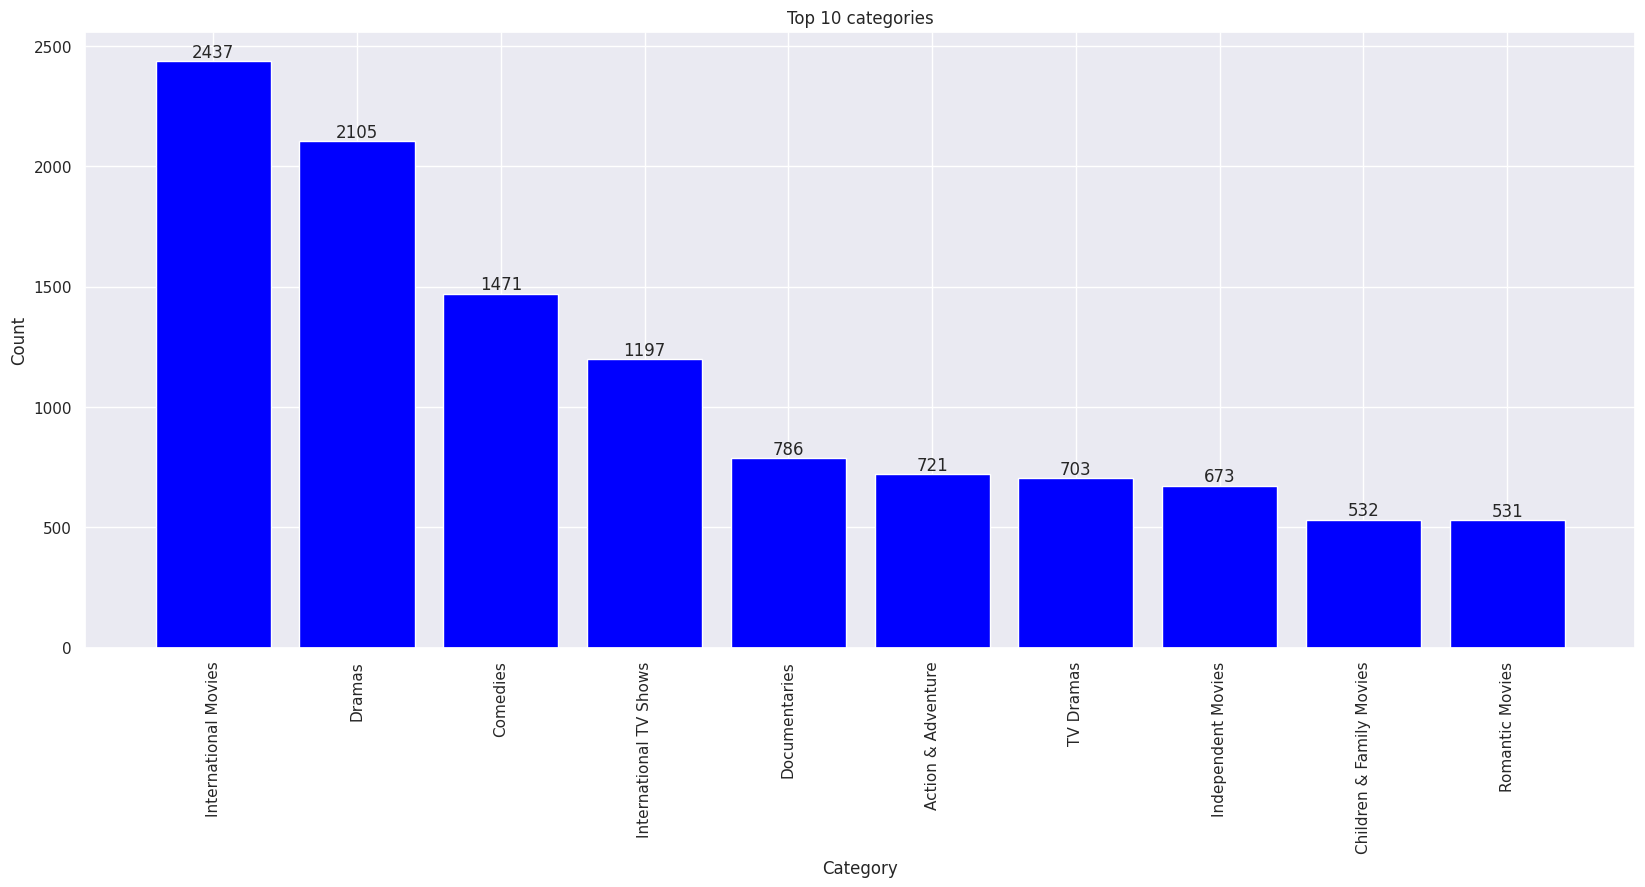

In [ ]:
sorted_categories = sorted(categories, key=lambda x: category_wise_count[x], reverse=True)

# Get the top 10 categories
top_10_categories = sorted_categories[:10]

# Get the counts for the top 10 categories
counts = [category_wise_count[category] for category in top_10_categories]

# Create the bar plot
plt.figure(figsize=(20, 8))
plt.bar(top_10_categories, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and ticks
plt.title("Top 10 categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


#### creating a new column as number of categories

In [ ]:
(df.listed_in.iloc[0]).split(",")


['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((df.listed_in.iloc[0]).split(","))

3

In [ ]:
# storing into the list after splitting the values

no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
# assigning values into the list
df['no_of_category'] = no_of_category


In [ ]:
# creating the haed of the  dataset selecting two features of the column
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


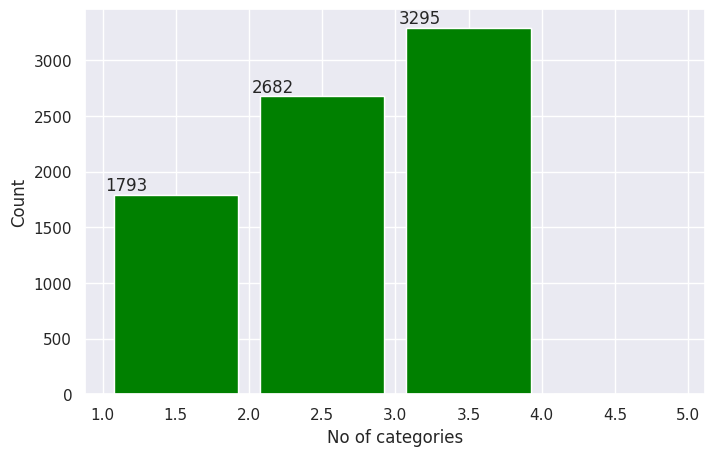

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df.no_of_category, bins=[1, 2, 3,4,5], range=(1, 5), rwidth=0.85, color='green')

# Calculate the count for each bin
counts, bin_edges, _ = plt.hist(df.no_of_category, bins=[1, 2, 3, 4], range=(1, 5), rwidth=0.85, color='green')

# Add count values on top of each bar
for count, x, y in zip(counts, bin_edges[:-1], counts):
    plt.text(x + 0.165, y, str(int(count)), ha='center', va='bottom')

plt.xlabel("No of categories")
plt.ylabel("Count")

plt.show()


### Analyze the date_added of the shows into the platform


In [ ]:
df['date_added'].head()


0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

#### find the number of shows uploaded with respect to the months

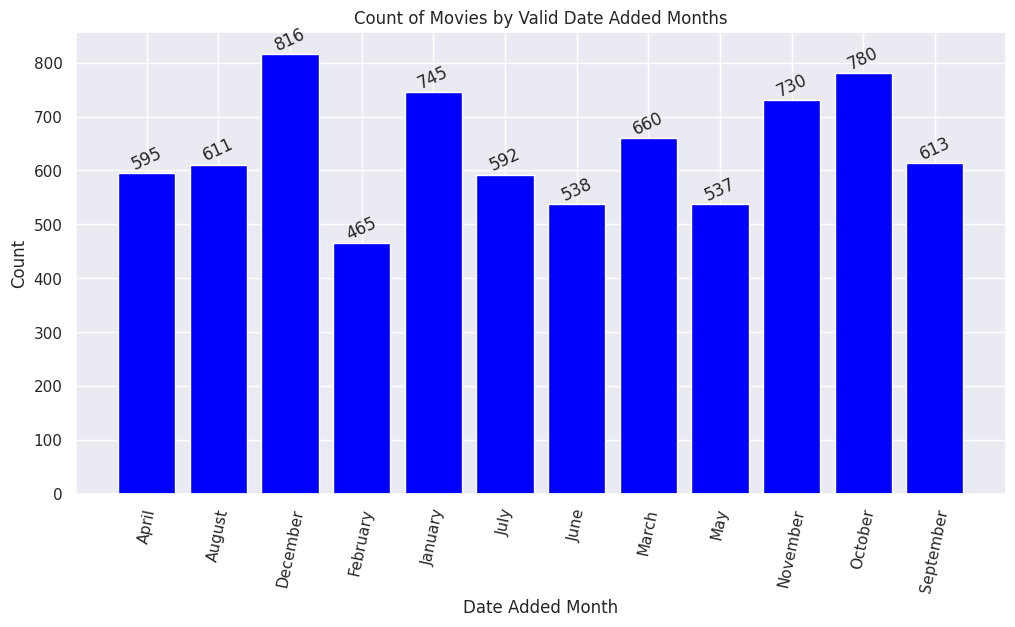

In [ ]:
# Create a new column 'date_added_month' by splitting the 'date_added' column and extracting the month
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])

# Filter out non-month values and calculate the count for each value
valid_month_counts = df['date_added_month'].value_counts()

# Remove values that are not addressed as months
valid_month_counts = valid_month_counts[valid_month_counts.index.str.match(r'[A-Za-z]+')]

# Sort the data by month
sorted_counts = valid_month_counts.sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='blue')

# Add count values on top of the bars
for i, count in enumerate(sorted_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', rotation = 25)

# Add labels and title
plt.xlabel('Date Added Month')
plt.ylabel('Count')
plt.title('Count of Movies by Valid Date Added Months')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=78)

# Show the plot
plt.show()


### Now we'll find and analyze the show id of the dataset

##### find the null values of the features

In [ ]:
df['show_id'].isnull().sum()

0

In [ ]:
# find the duplication of the values'
df[df['show_id'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month


In [ ]:
# find the unique values of the dataset
df.show_id.nunique()

7770

There is no null values present in the dataset and also all the values are unique inthe dataset.

### Analyze the rating features of the dataset


In [ ]:
# find the null values
df['rating'].isnull().sum()

0

In [ ]:
# count the number of shows belongs to each categories
rating_counts = df['rating'].value_counts()
rating_counts

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

#### visualize the rating categories of the data


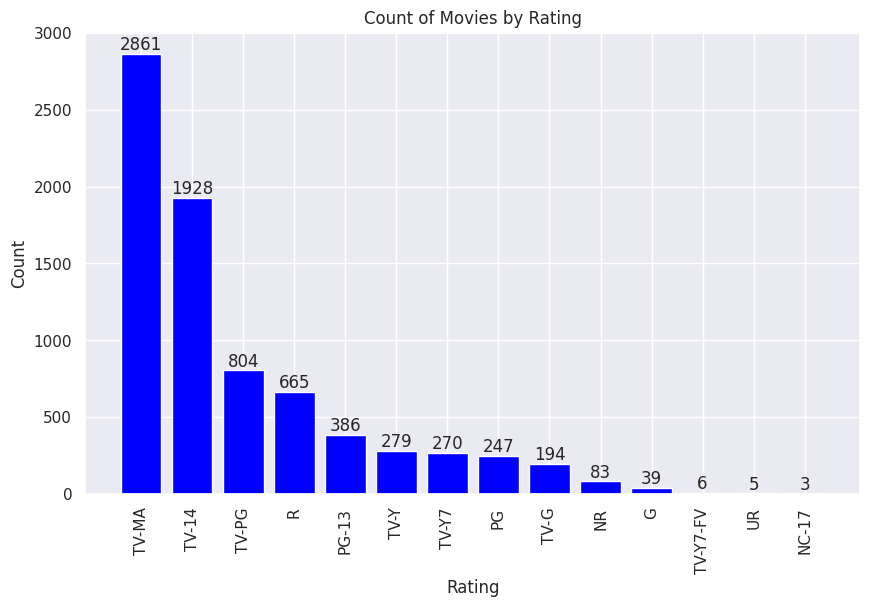

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='blue')

# Add count values on top of the bars
for i, count in enumerate(rating_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Movies by Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the pl
plt.show()

#### find the top rated TV-Show 


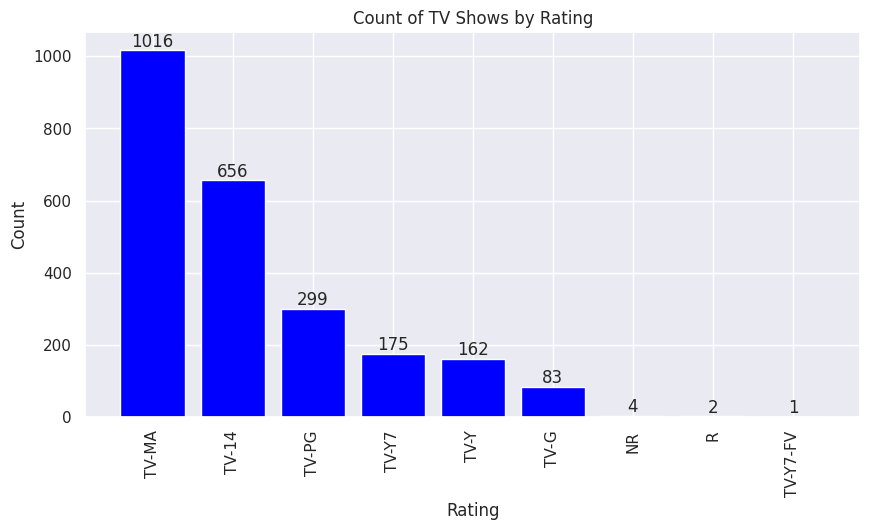

In [ ]:
# Filter the dataframe to include only TV shows
df_tv_show = df[df['type'] == 'TV Show']

# Group by rating and count the number of TV shows
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# Create the histogram
plt.figure(figsize=(10, 5))
plt.bar(tv_ratings['rating'], tv_ratings['count'], color='blue')

# Add count values on top of the bars
for i, count in enumerate(tv_ratings['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of TV Shows by Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


#### find the top rated movies.

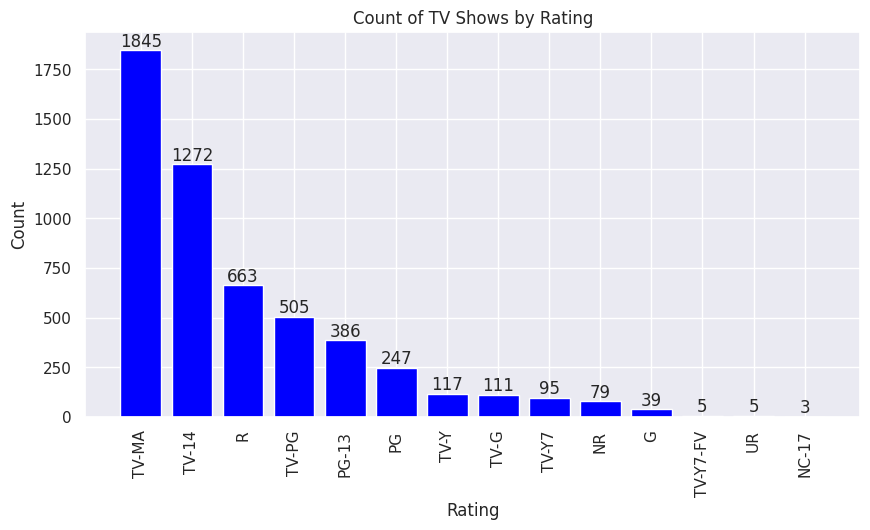

In [ ]:
# Filter the dataframe to include only TV shows
df_tv_show = df[df['type'] == 'Movie']

# Group by rating and count the number of TV shows
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# Create the histogram
plt.figure(figsize=(10, 5))
plt.bar(tv_ratings['rating'], tv_ratings['count'], color='blue')

# Add count values on top of the bars
for i, count in enumerate(tv_ratings['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of TV Shows by Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


## **NLP** of Description section

### Analyze the description of the movies


In [ ]:
# find the columns of the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month'],
      dtype='object')

In [ ]:
df['description'].loc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
# importing the necessary libraries and download NLP

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# import the nltk libraries
import nltk

#### remove the punchuation mark from the description of the shows

In [ ]:
import string
def remove_punctuation(text):
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# apply the function to the dataset
df['description']=df['description'].apply(lambda x: remove_punctuation(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


In [ ]:
df['description'].loc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### Remove the stop words form the Moview Summary .


**Stop Words:** 

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

In [ ]:
import nltk

# download nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# remove the stopwords
words = nltk.corpus.stopwords.words('english')

# displaying the stopwords
for i in words:
  print(i , end=',  ')
  

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in words]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
# apply the function to the dataframe 
df['description']=df['description'].apply(lambda x: remove_stopwords(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


#### Import CountVectorizer and create the count matrix


CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

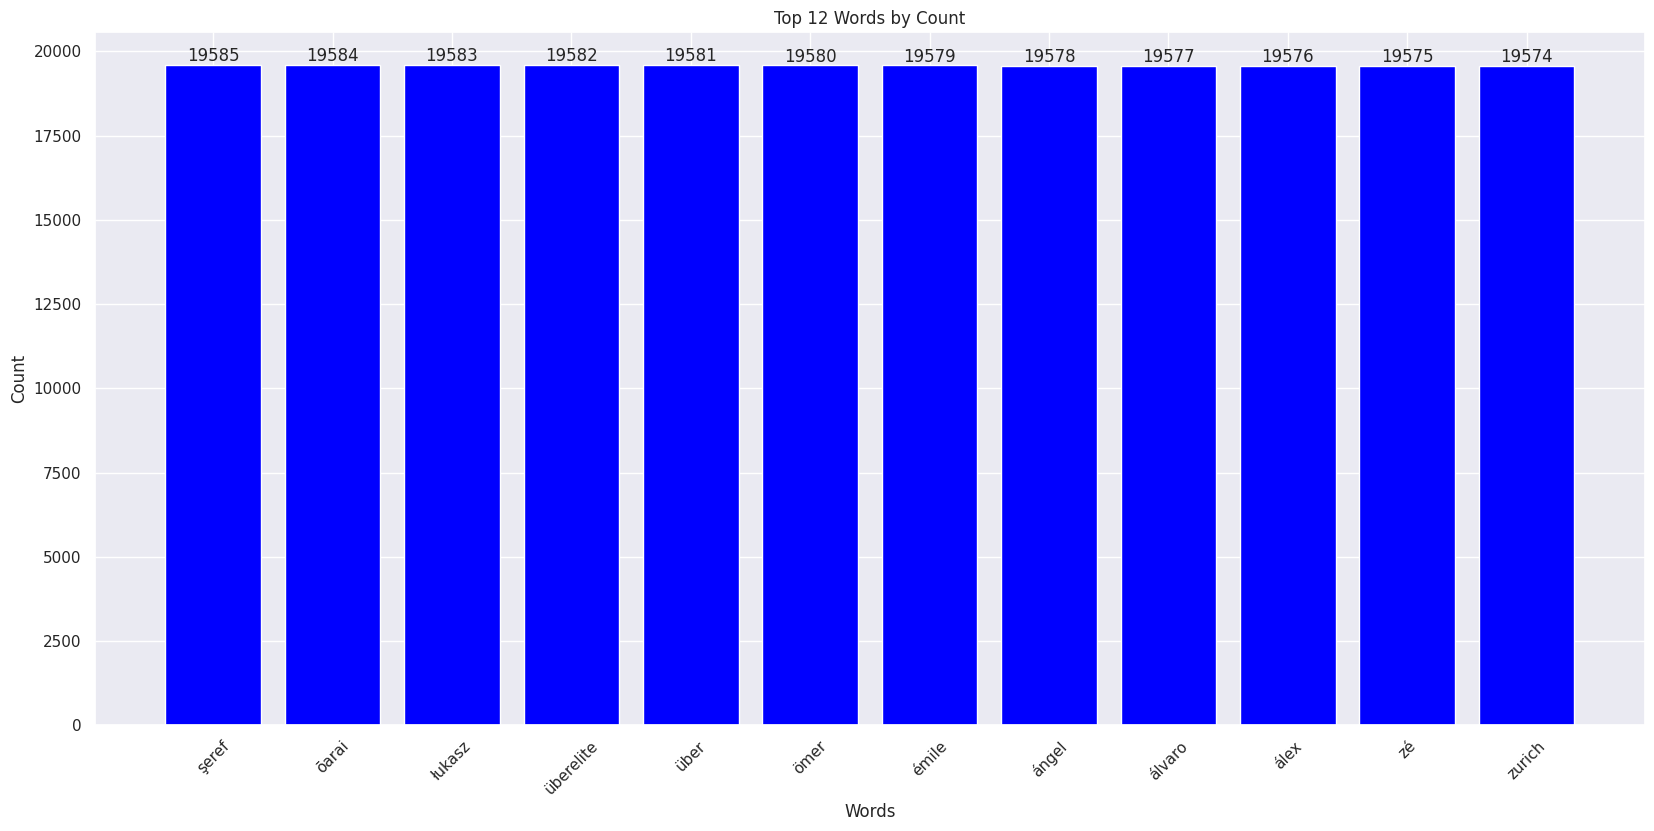

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
vocabulary = count_vectorizer.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 9))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 12 Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


####**Snowball Stemmer:** 

It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.

First, let’s look at what is stemming-

Stemming: It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP).

In [ ]:
from nltk.stem import SnowballStemmer

# Set the stemmer language
stemmer = SnowballStemmer("english")

# Function to apply stemming to a text
def apply_stemming(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Apply stemming to each word
    return ' '.join(stemmed_tokens)  # Join the stemmed words back into a single string

# Apply stemming to the 'description' column
df['description'] = df['description'].apply(apply_stemming)




In [ ]:
# Print the updated DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


####**TfidfVectorizer**


The TfidfVectorizer is another text feature extraction method available in the sklearn.feature_extraction.text module. It transforms text data into a numerical representation using the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme.

TF-IDF considers both the term frequency (TF) and the inverse document frequency (IDF) to give weight to terms in a document relative to their importance in the entire corpus. It is commonly used for tasks such as text classification, clustering, and information retrieval

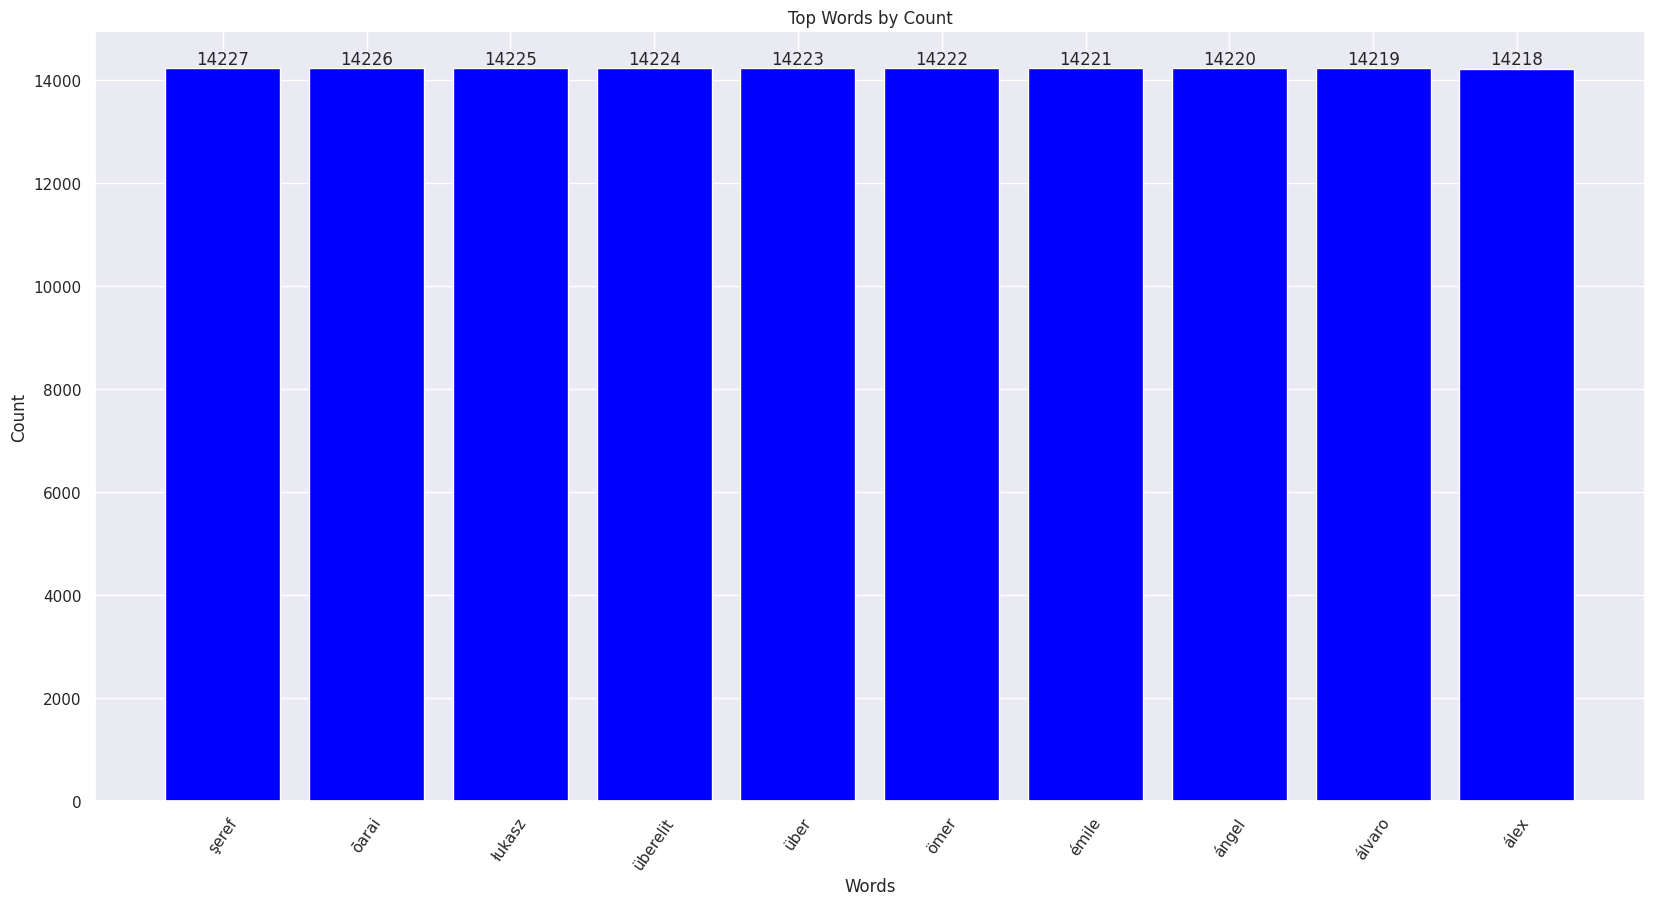

In [ ]:
# Create the object of TfidfVectorizer
tfidf_vectorizer_desc = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer_desc.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
vocabulary = tfidf_vectorizer_desc.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:10]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=55)

# Show the plot
plt.show()


#### Adding a new column in the dataset as Length of the description


In [ ]:
df['length_desc'] = df['description'].apply(lambda x: len(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,length_desc
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


### Analyze the listed-in data

#### check the columns and remove the punctuation marks


In [ ]:
# apply the function to the dataset
df['listed_in']=df['listed_in'].apply(lambda x: remove_punctuation(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,length_desc
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


#### Remove stopwords form the dataset


In [ ]:
# apply the function to the dataframe 
df['listed_in']=df['listed_in'].apply(lambda x: remove_stopwords(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,length_desc
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,horror movies international movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,action adventure independent movies scifi fantasy,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,dramas,brilliant group student becom cardcount expert...,1,January,99


#### find the top words apper in Listed_in column

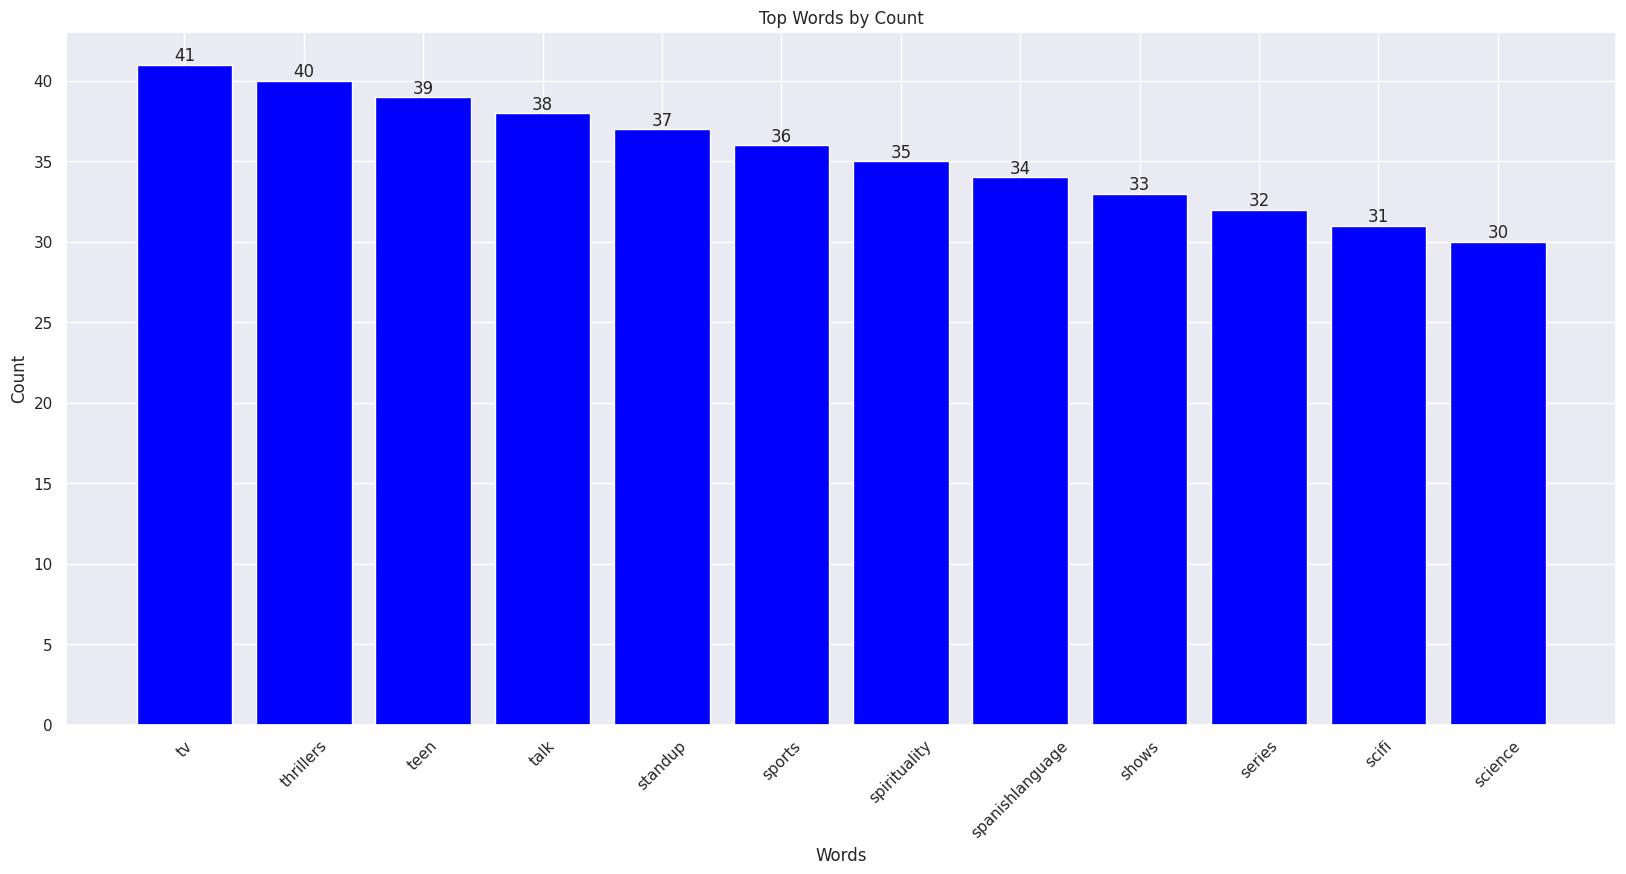

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
vocabulary = count_vectorizer.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 9))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### apply stemming 


In [ ]:
# Apply stemming to the 'listed_in' column
df['listed_in'] = df['listed_in'].apply(apply_stemming)

#### find the top most words appear in listed_in columns


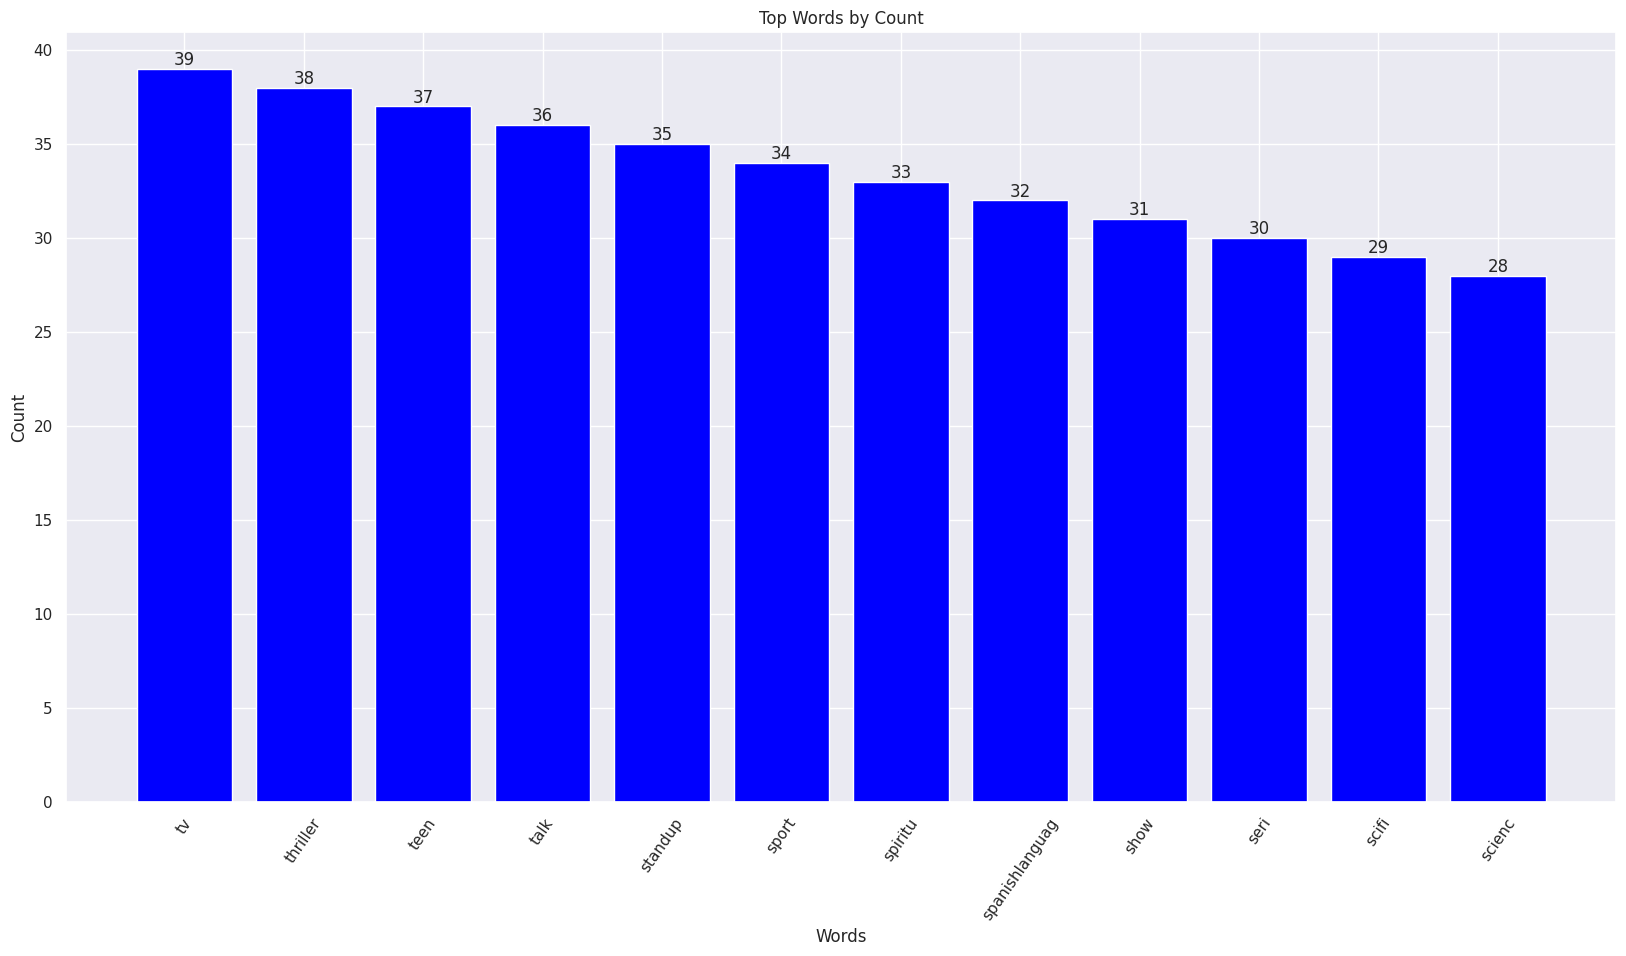

In [ ]:
# Create the object of TfidfVectorizer
tfidf_vectorizer_listed = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer_listed.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
vocabulary = tfidf_vectorizer_listed.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=55)

# Show the plot
plt.show()


#### Apply NLP to title columns of the movies

In [ ]:
# apply the function to the dataframe 
df['title']=df['title'].apply(lambda x: remove_stopwords(x))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,length_desc
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,drama,brilliant group student becom cardcount expert...,1,January,99


#### most occured words in shows title


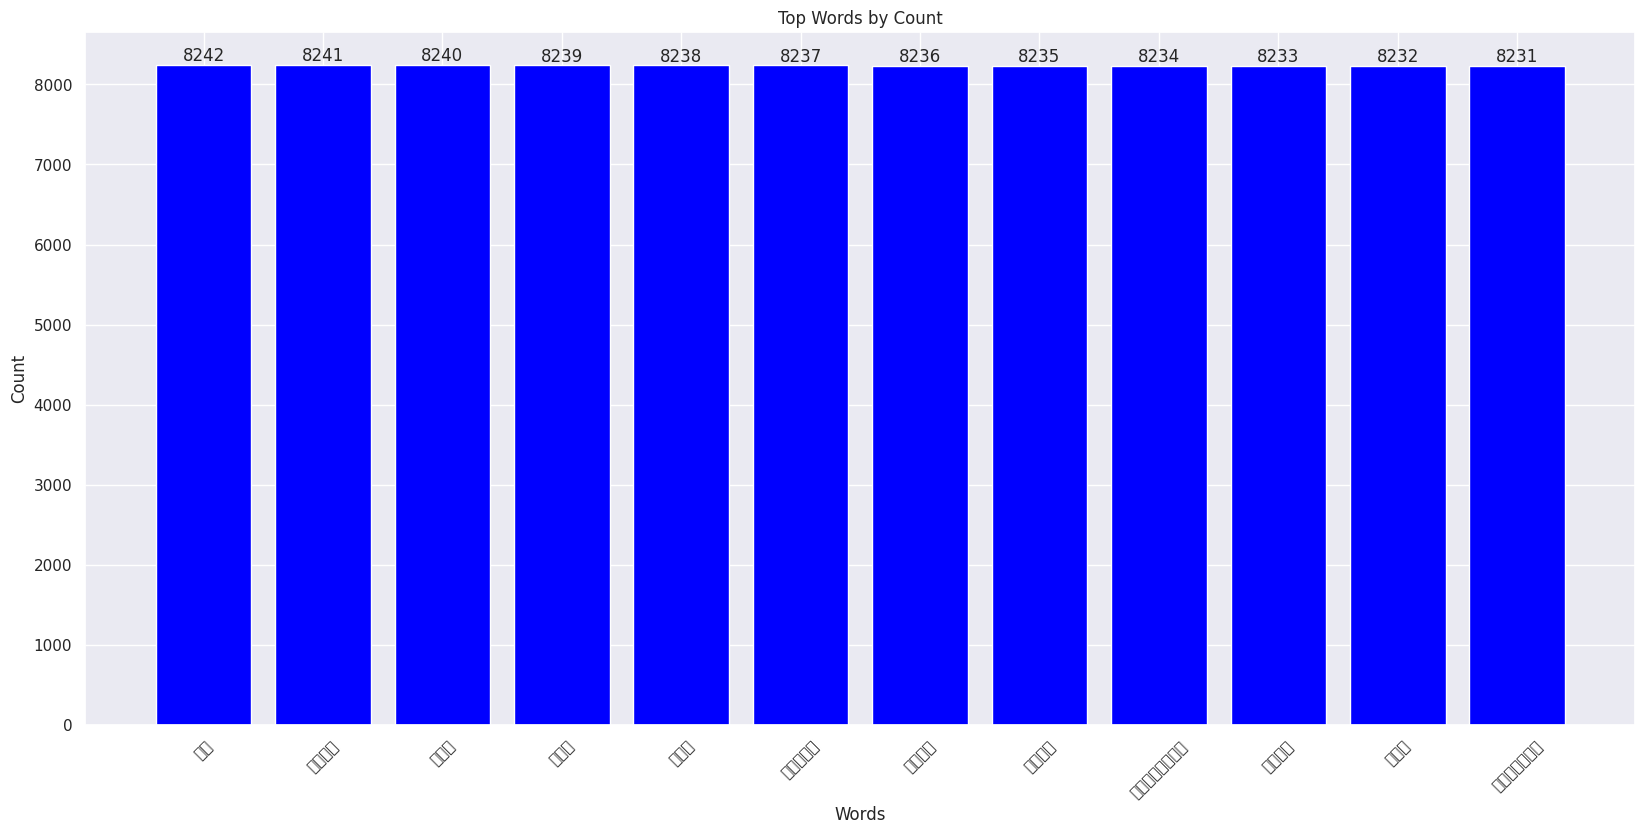

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
count_vectorizer.fit(df['title'])

# Collect the vocabulary items used in the vectorizer
vocabulary = count_vectorizer.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 9))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Apply stemming to the 'title' column
df['title'] = df['title'].apply(apply_stemming)

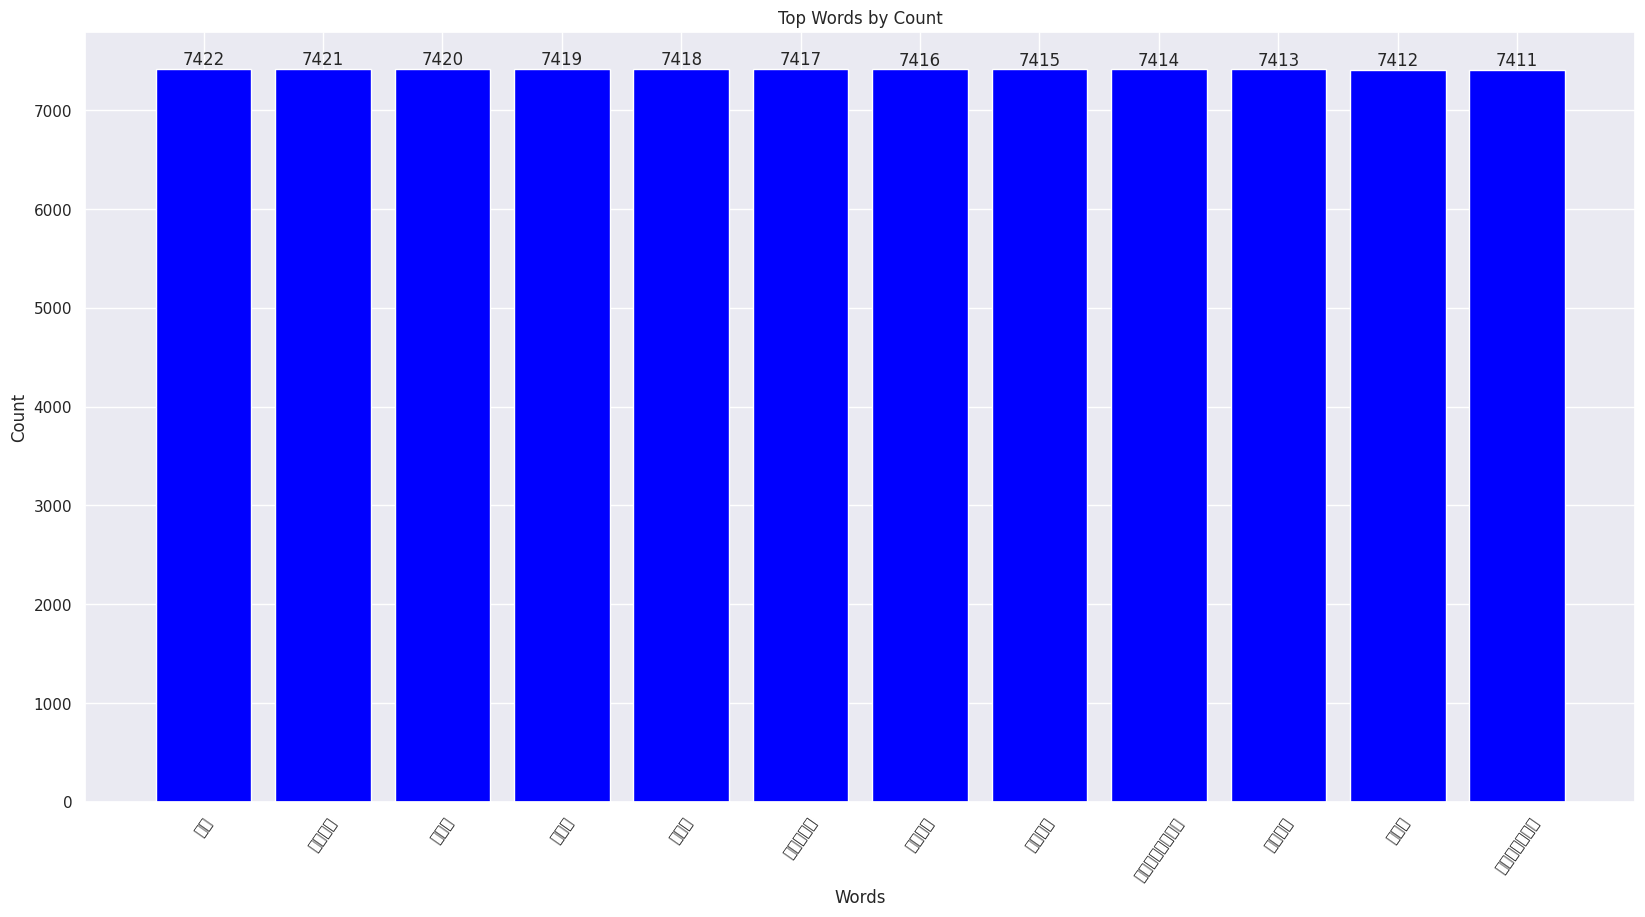

In [ ]:
# Create the object of TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer_title.fit(df['title'])

# Collect the vocabulary items used in the vectorizer
vocabulary = tfidf_vectorizer_title.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=55)

# Show the plot
plt.show()


#### Apply the NLP according to the cast 

In [ ]:
# Define the function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Check if the value is a non-null string
        # Apply the transformation to remove stopwords
        # (Replace this with your own logic for removing stopwords)
        processed_text = text.translate(str.maketrans('', '', string.punctuation))
        return processed_text
    else:
        return np.nan

# Apply the function to the 'cast' column
df['cast'] = df['cast'].apply(lambda x: remove_stopwords(x))

# Print the updated DataFrame


In [ ]:
# apply the function to the dataframe 
df['cast']=df['cast'].apply(lambda x: remove_stopwords(x))

#df.head()

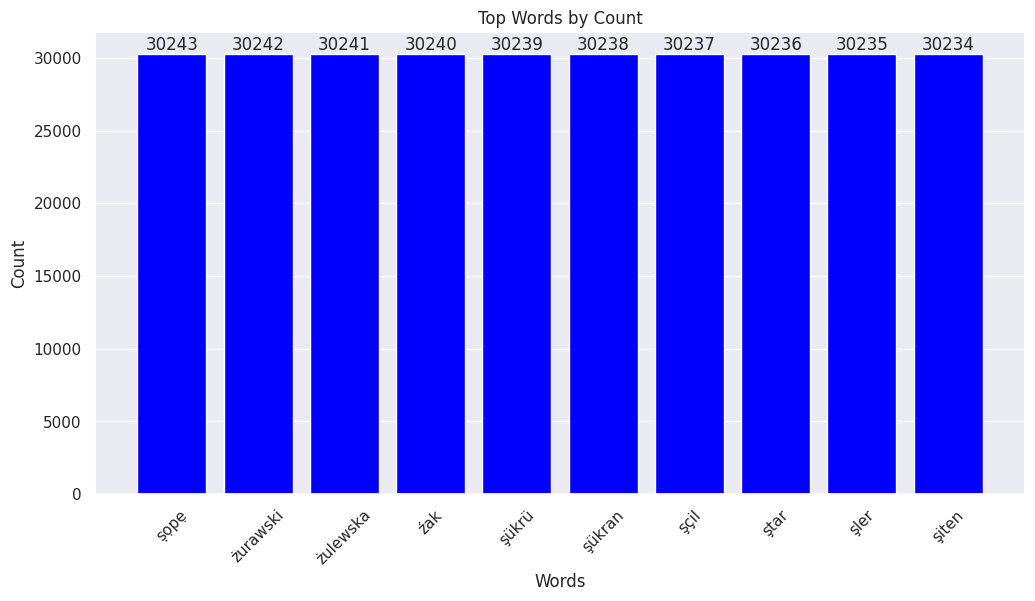

In [ ]:
# Fill missing values in 'cast' column with an empty string
df['cast'] = df['cast'].fillna('')

# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
count_vectorizer.fit(df['cast'])

# Collect the vocabulary items used in the vectorizer
vocabulary = count_vectorizer.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:10]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Apply stemming to the 'cast' column
df['cast'] = df['cast'].apply(apply_stemming)

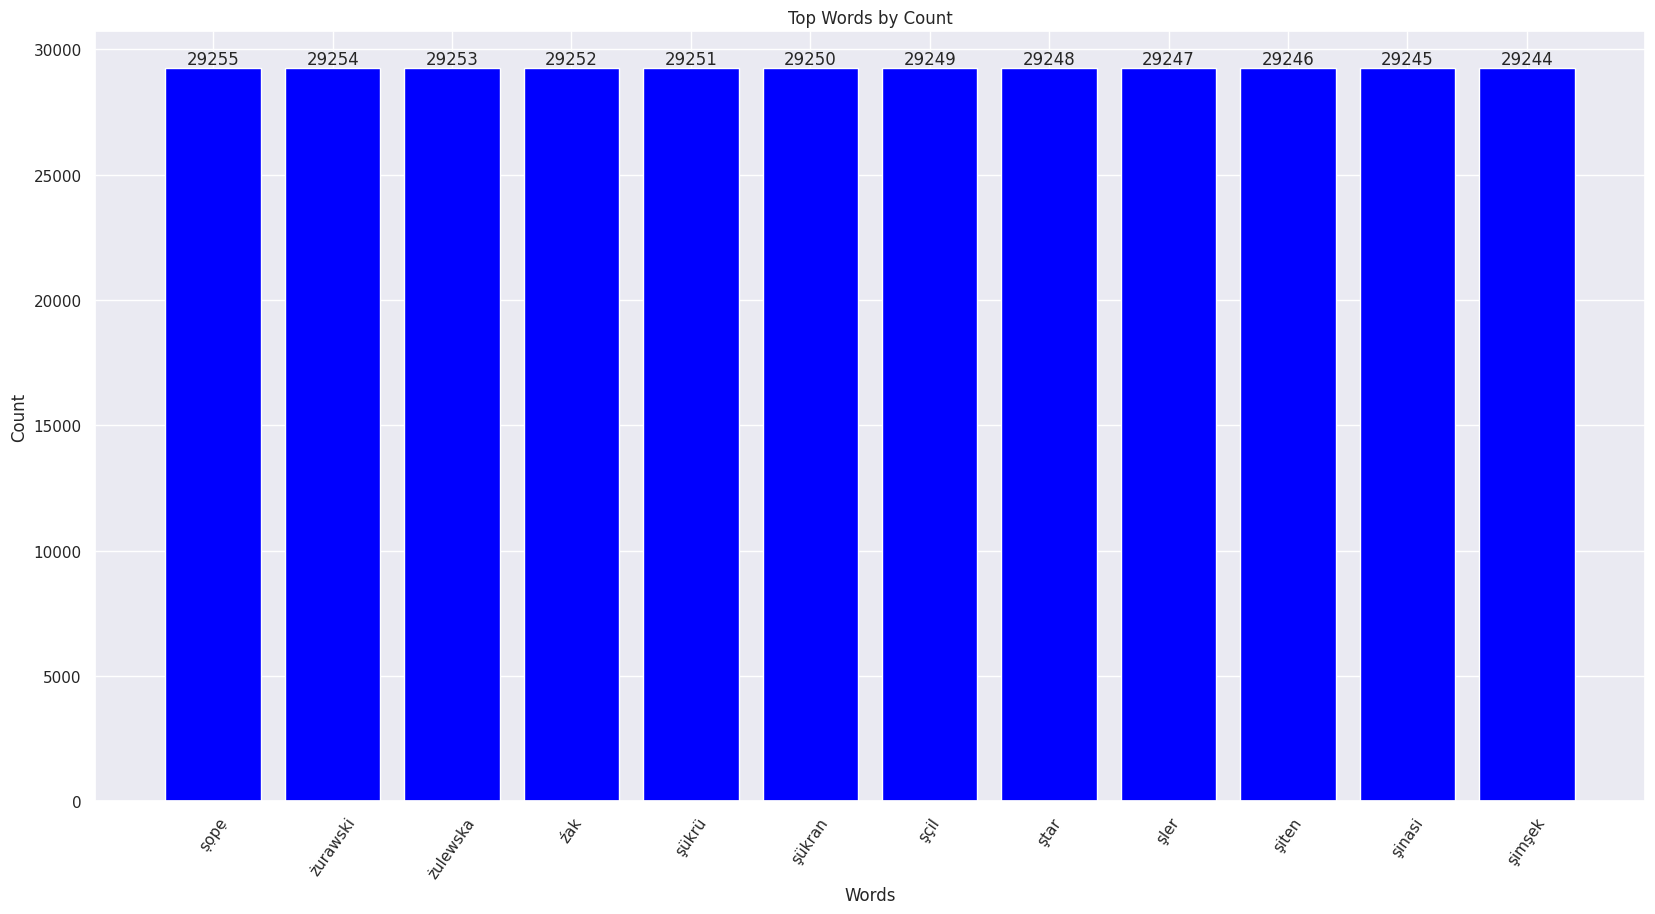

In [ ]:
# Create the object of TfidfVectorizer
tfidf_vectorizer_cast = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer_cast.fit(df['cast'])

# Collect the vocabulary items used in the vectorizer
vocabulary = tfidf_vectorizer_cast.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=55)

# Show the plot
plt.show()


#### Apply NLP as per director of the show

In [ ]:
# apply the function to the dataframe 
df['director']=df['director'].apply(lambda x: remove_stopwords(x))
#df.head()

In [ ]:
# apply the function to the dataframe 
df['director']=df['director'].apply(lambda x: remove_stopwords(x))
#df.head()

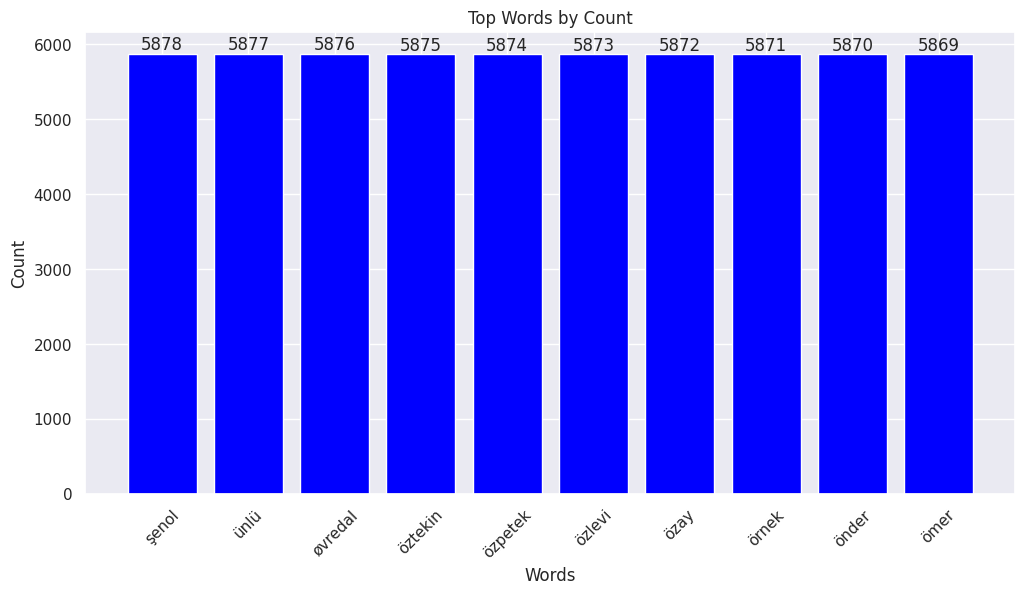

In [ ]:
# Fill missing values in 'director' column with an empty string
df['director'] = df['director'].fillna('')

# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
count_vectorizer.fit(df['director'])

# Collect the vocabulary items used in the vectorizer
vocabulary = count_vectorizer.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:10]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Apply stemming to the 'director' column
df['director'] = df['director'].apply(apply_stemming)

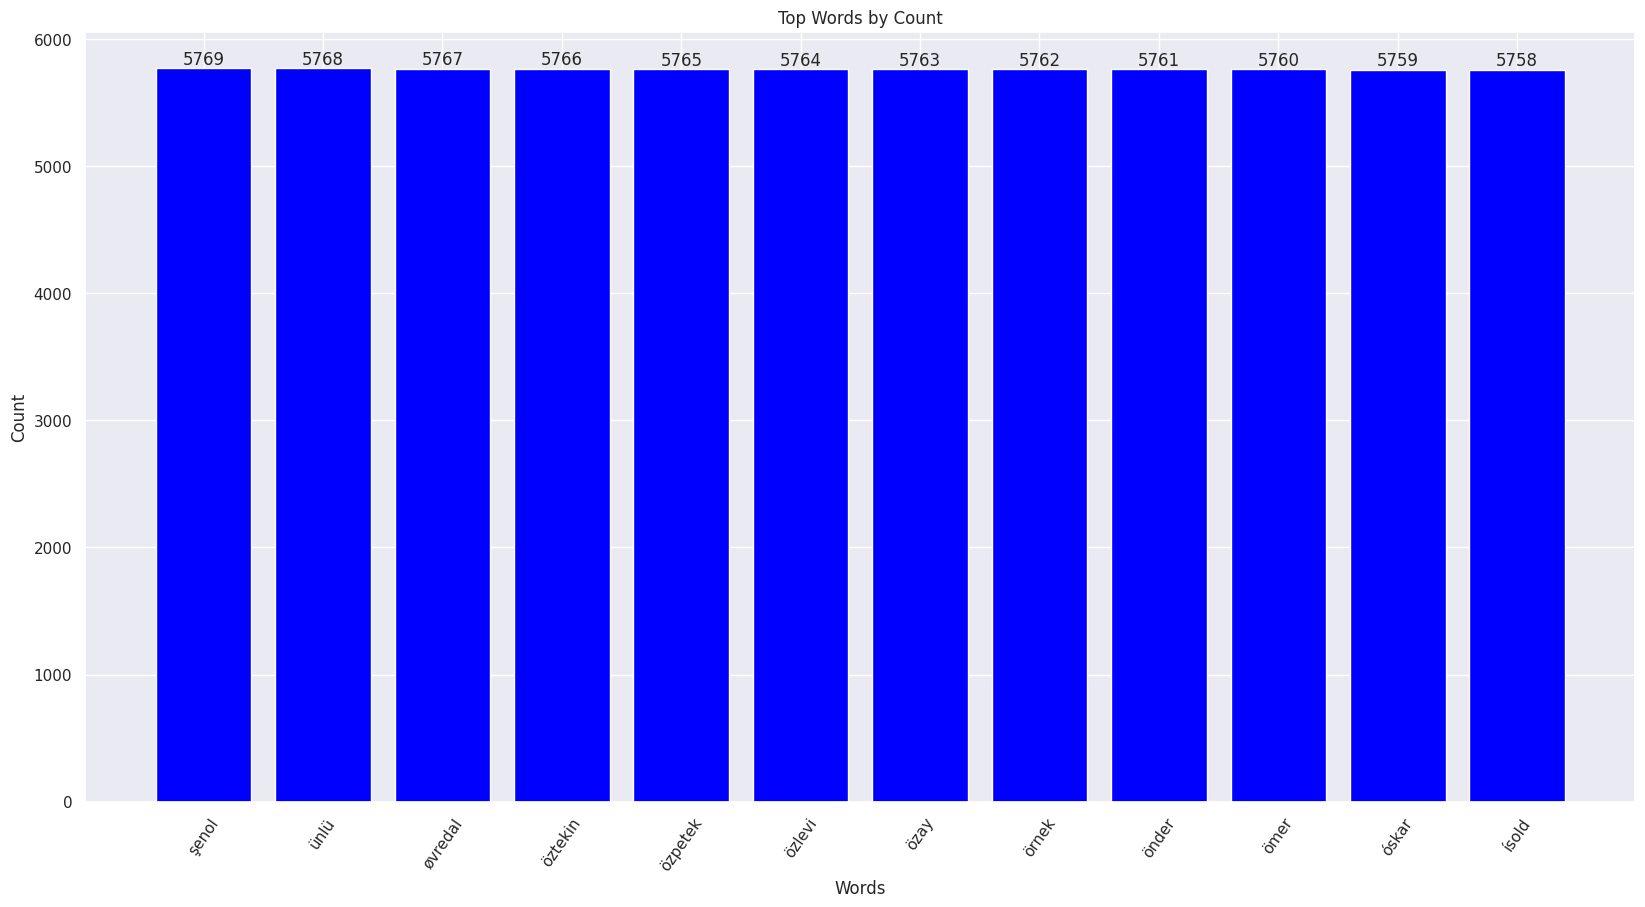

In [ ]:
# Create the object of TfidfVectorizer
tfidf_vectorizer_director = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer_director.fit(df['director'])

# Collect the vocabulary items used in the vectorizer
vocabulary = tfidf_vectorizer_director.vocabulary_.items()

# Sort the vocabulary items based on their counts in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Select the top 10 words and their counts
top_10_words = sorted_vocabulary[:12]
words, counts = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='blue')

# Add count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top Words by Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=55)

# Show the plot
plt.show()


## **Recommended System**


**Cosine similarity** measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month', 'length_desc'],
      dtype='object')

In [ ]:
#Filling null values with empty string.
recommend_data=df.fillna('')



In [ ]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
recommend_data=recommend_data[features]

In [ ]:
for feature in features:
    recommend_data[feature] = recommend_data[feature].apply(clean_data)
    
recommend_data.head()

,title,director,cast,listed_in,description
0,3%,,joãomiguelbiancacomparatomichelgomerodolfovale...,interntvshowtvdramatvscififantasi,futurelitinhabitislandparadisfarcrowdslumgeton...
1,7:19,jorgmichelgrau,demiánbichirhéctorbonillaoscarserranoazaliaort...,dramainternmovi,devastearthquakhitmexicocititrapsurvivorwalkli...
2,23:59,gilbertchan,teddchanstellachunghenleyhiilawrenckohtommikua...,horrormoviinternmovi,armirecruitfounddeadfellowsoldierforcconfrontt...
3,9,shaneacker,elijahwoodjohncreillijennifconnellichristophpl...,actionadventurindependmoviscififantasi,postapocalyptworldragdolrobothidefeardangermac...
4,21,robertluket,jimsturgesskevinspaceykatebosworthaaronyooliza...,drama,brilliantgroupstudentbecomcardcountexpertinten...


In [ ]:
recommend_data.head()

,title,director,cast,listed_in,description
0,3%,,joãomiguelbiancacomparatomichelgomerodolfovale...,interntvshowtvdramatvscififantasi,futurelitinhabitislandparadisfarcrowdslumgeton...
1,7:19,jorgmichelgrau,demiánbichirhéctorbonillaoscarserranoazaliaort...,dramainternmovi,devastearthquakhitmexicocititrapsurvivorwalkli...
2,23:59,gilbertchan,teddchanstellachunghenleyhiilawrenckohtommikua...,horrormoviinternmovi,armirecruitfounddeadfellowsoldierforcconfrontt...
3,9,shaneacker,elijahwoodjohncreillijennifconnellichristophpl...,actionadventurindependmoviscififantasi,postapocalyptworldragdolrobothidefeardangermac...
4,21,robertluket,jimsturgesskevinspaceykatebosworthaaronyooliza...,drama,brilliantgroupstudentbecomcardcountexpertinten...


In [ ]:
def r_machine(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

recommend_data['soup'] = recommend_data.apply(r_machine, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(recommend_data['soup'])



# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
recommend_data=recommend_data.reset_index()

indices = pd.Series(recommend_data.index, index=recommend_data['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


In [ ]:
get_recommendations_new('pk', cosine_sim)

100               3 idiot
2571               haapus
4698        our shine day
36                # selfi
37             # selfi 69
49          10 jour en or
78                2 state
266     aajcha diva majha
274             aata pita
277              abbi sen
Name: title, dtype: object

## **Create the pikle file to deployment of the Model**

In [ ]:
import pickle

In [ ]:
pickle.dump(df,open('movie_list.pkl','wb'))
pickle.dump(cosine_sim,open('similarity.pkl','wb'))